In [1]:
from numpy.random import randint
import matplotlib.pyplot as plt

In [2]:
class Pile:
    def __init__(self):
        self.lst = [] 
    
    def empty(self):
        return self.lst == [] 
    
    def push(self, x):
        self.lst.append(x)

    def pop(self):
        if self.empty():
            raise ValueError("pile vide") 
        return self.lst.pop()
    
def explorer(laby): 
    pile = Pile()
    pile.push((0, laby.q - 1)) 
    laby.tab[0][laby.q - 1].etat = False 
    while True:
        i, j = pile.pop()
        if i == laby.p - 1 and j == 0:
            break
        if j > 0 and laby.tab[i][j].S and laby.tab[i][j-1].etat:
            pile.push((i, j)) 
            pile.push((i, j-1)) 
            laby.tab[i][j-1].etat = False
        elif i < laby.p-1 and laby.tab[i][j].E and laby.tab[i+1][j].etat: 
            pile.push((i, j))
            pile.push((i+1, j))
            laby.tab[i+1][j].etat = False
        elif j < laby.q-1 and laby.tab[i][j].N and laby.tab[i][j+1].etat: 
            pile.push((i, j))
            pile.push((i, j+1))
            laby.tab[i][j+1].etat = False
        elif i > 0 and laby.tab[i][j].W and laby.tab[i-1][j].etat: 
            pile.push((i, j))
            pile.push((i-1, j))
            laby.tab[i-1][j].etat = False
    return pile.lst
    
class Case:
    def __init__(self):
        self.N = False 
        self.W = False 
        self.S = False 
        self.E = False 
        self.etat = False

class Labyrinthe:
    def __init__(self, p, q):
        self.p = p
        self.q = q
        self.tab = [[Case() for j in range(q)] for i in range(p)]
    
    def show(self):
        plt.plot([0, 0, self.p, self.p, 0], [0, self.q, self.q, 0, 0], linewidth=2) 
        for i in range(self.p-1):
            for j in range(self.q):
                if not self.tab[i][j].E:
                    plt.plot([i+1, i+1], [j, j+1], 'b') 
        for j in range(self.q-1):
            for i in range(self.p):
                if not self.tab[i][j].N:
                    plt.plot([i, i+1], [j+1, j+1], 'b') 
        
        plt.axis([-1, self.p+1, -1, self.q+1])
        plt.show()
        
    def solution(self):
        sol = explorer(self) 
        X, Y = [], []
        for (i, j) in sol:
            X.append(i+.5)
            Y.append(j+.5) 
        X.append(self.p-.5)
        Y.append(.5)
        plt.plot(X, Y, 'r', linewidth=2) 
        self.show()

def creation(p, q):
    laby = Labyrinthe(p, q)
    pile = Pile()
    i, j = randint(p), randint(q) 
    pile.push((i, j)) 
    laby.tab[i][j].etat = True 
    while not pile.empty():
        i, j = pile.pop()
        v = []
        if j < q-1 and not laby.tab[i][j+1].etat:
            v.append('N')
        if i > 0 and not laby.tab[i-1][j].etat:
            v.append('W')
        if j > 0 and not laby.tab[i][j-1].etat:
            v.append('S')
        if i < p-1 and not laby.tab[i+1][j].etat:
            v.append('E') 
        if len(v) > 1:
            pile.push((i, j)) 
        if len(v) > 0:
            c = v[randint(len(v))] 
            if c == 'N':
                laby.tab[i][j].N = True
                laby.tab[i][j+1].S = True
                laby.tab[i][j+1].etat = True 
                pile.push((i, j+1))
            elif c == 'W':
                laby.tab[i][j].W = True 
                laby.tab[i-1][j].E = True 
                laby.tab[i-1][j].etat = True 
                pile.push((i-1, j))
            elif c == 'S':
                laby.tab[i][j].S = True 
                laby.tab[i][j-1].N = True 
                laby.tab[i][j-1].etat = True 
                pile.push((i, j-1))
            else:
                laby.tab[i][j].E = True 
                laby.tab[i+1][j].W = True 
                laby.tab[i+1][j].etat = True 
                pile.push((i+1, j))
    return laby


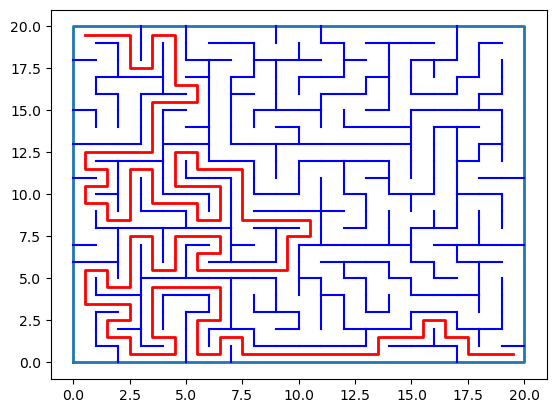

In [9]:
creation(20,20).solution()